In [0]:
#!unzip air-pollution-in-seoul.zip

In [180]:
import pandas as pd
import numpy as np
import pickle
from sklearn.externals import joblib 
% matplotlib inline
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [181]:
data = pd.read_csv('/content/drive/My Drive/Dataset/Measurement_summary.csv')
data.head(10)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
5,2017-01-01 05:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.046,0.002,1.1,70.0,61.0
6,2017-01-01 06:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.049,0.002,1.1,66.0,57.0
7,2017-01-01 07:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.045,0.002,1.0,71.0,60.0
8,2017-01-01 08:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.047,0.002,1.1,72.0,60.0
9,2017-01-01 09:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.047,0.002,1.1,74.0,63.0


In [182]:
# Retriving data for station code 106 for NO2
data_106=data[(data['Station code']==106) & (data['NO2']>0)]
print(len(data_106))
print(data_106.head(10))

25052
        Measurement date  Station code  ...  PM10  PM2.5
129500  2017-01-01 00:00           106  ...  71.0   62.0
129501  2017-01-01 01:00           106  ...  70.0   62.0
129502  2017-01-01 02:00           106  ...  72.0   63.0
129503  2017-01-01 03:00           106  ...  66.0   60.0
129504  2017-01-01 04:00           106  ...  66.0   61.0
129505  2017-01-01 05:00           106  ...  65.0   58.0
129506  2017-01-01 06:00           106  ...  64.0   58.0
129507  2017-01-01 07:00           106  ...  63.0   56.0
129508  2017-01-01 08:00           106  ...  67.0   59.0
129509  2017-01-01 09:00           106  ...  66.0   63.0

[10 rows x 11 columns]


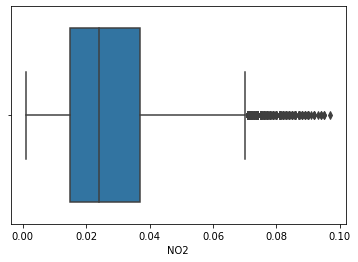

In [183]:
import seaborn as sns
sns.boxplot(data_106['NO2'])

24868


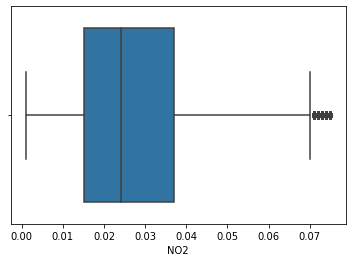

In [184]:
from scipy import stats
z = np.abs(stats.zscore(data_106['NO2']))
threshold = 3
#print(len(np.where(z > 3)))
data_106_Rout = data_106[(z < 3)]
print(len(data_106_Rout))
sns.boxplot(data_106_Rout['NO2'])

In [185]:
df=data_106_Rout['NO2']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)

(24868, 1)


In [186]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))


[0.001] [0.075]
24868
0.0 1.0


In [187]:
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])


24863 [0.8783783783783785, 0.8513513513513514, 0.8378378378378379, 0.7702702702702703, 0.7297297297297298]


In [188]:
matrix=np.matrix(y)
print(matrix.shape)
new_data = pd.DataFrame(matrix,columns=['x1','x2','x3','x4','y'])
new_data.head(10)


(24863, 5)


,x1,x2,x3,x4,y
0,0.878378,0.851351,0.837838,0.770270,0.729730
1,0.851351,0.837838,0.770270,0.729730,0.675676
2,0.837838,0.770270,0.729730,0.675676,0.648649
3,0.770270,0.729730,0.675676,0.648649,0.621622
4,0.729730,0.675676,0.648649,0.621622,0.635135
5,0.675676,0.648649,0.621622,0.635135,0.608108
6,0.648649,0.621622,0.635135,0.608108,0.662162
7,0.621622,0.635135,0.608108,0.662162,0.675676
8,0.635135,0.608108,0.662162,0.675676,0.662162
9,0.608108,0.662162,0.675676,0.662162,0.648649


In [189]:
print(matrix[:,4])

[[0.72972973]
 [0.67567568]
 [0.64864865]
 ...
 [0.39189189]
 [0.36486486]
 [0.55405405]]


In [190]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor_Rout.pkl')
from google.colab import files
files.download('linear_regressor_Rout.pkl')
print(prediction.shape,prediction[0:5])

(8205, 1) [[0.47934223]
 [0.11748801]
 [0.8380729 ]
 [0.84716338]
 [0.3431428 ]]


In [191]:
print(model.score(X_train,y_train))
print(model.intercept_)
print(model.coef_)

0.8882056297931495
[0.02646966]
[[ 0.01849442 -0.0034921  -0.26574425  1.17711567]]


In [192]:
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

mean squared eror :  0.004849670195874197
absolute mean error :  0.04952911507691928
0.8873021456989378


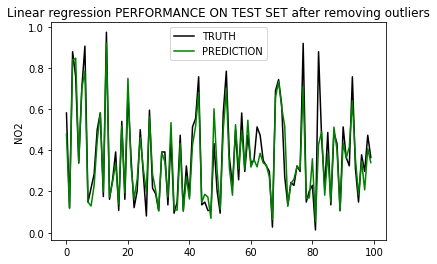

In [193]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET after removing outliers')
plt.ylabel('NO2')
plt.legend()
plt.show()

(25052, 1)
[0.001] [0.097]
25052
0.0 1.0
25047 [0.6770833333333335, 0.6562500000000001, 0.6458333333333335, 0.5937500000000001, 0.5625000000000001]
(8266, 1) [[0.31750447]
 [0.06866315]
 [0.37258018]
 [0.19409548]
 [0.3090679 ]]
mean squared eror :  0.0030096353408942942
absolute mean error :  0.03885920848557624
0.889430957847655


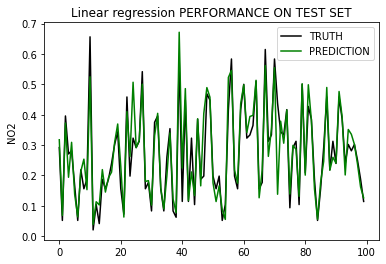

In [194]:
# IMPLEMENTING LINEAR REGRESSION WITHOUT REMOVING OUTLIERS
df=data_106['NO2']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])
matrix= np.matrix(y)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor.pkl')
from google.colab import files
files.download('linear_regressor.pkl')
print(prediction.shape,prediction[0:5])
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET')
plt.ylabel('NO2')
plt.legend()
plt.show()

In [195]:
# BAYESIAN RIDGE REGRESSION
from sklearn import linear_model
from statsmodels.tsa.ar_model import AR
model = linear_model.BayesianRidge()

model.fit(X_train,y_train )
prediction=model.predict(X_test)
joblib.dump(model,'bayesian_regressor.pkl')
from google.colab import files
files.download('bayesian_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))

print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.003009651709445342
absolute mean error :  0.03885975989613018
0.8894303564940671


In [196]:
# IMLEMENTING  RANDOM FOREST ALGORITHM
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(max_depth=8, random_state=0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'randomforest_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


mean squared eror :  0.0030595297306594913
absolute mean error :  0.03917378187375404
0.8875979202001524


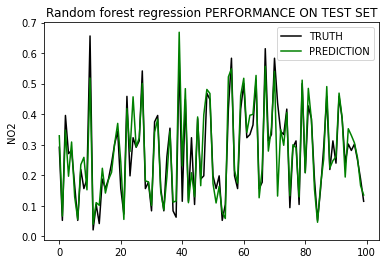

truth :  [[0.29166667]
 [0.05208333]
 [0.39583333]
 [0.27083333]
 [0.28125   ]
 [0.16666667]
 [0.05208333]
 [0.21875   ]
 [0.15625   ]
 [0.1875    ]]
prediction :  [0.32921377 0.06629944 0.34754315 0.1966847  0.30886286 0.12929724
 0.05545971 0.23443878 0.25855007 0.15219996]


In [197]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Random forest regression PERFORMANCE ON TEST SET')
plt.ylabel('NO2')
plt.legend()
plt.show()
print('truth : ',y_test[0:10])
print('prediction : ',prediction[0:10])

In [198]:
# RIDGE REGRESSION
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'ridge_regressor.pkl')
from google.colab import files
files.download('ridge_regressor.pkl')
print(mean_squared_error(y_test,prediction))
print(mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))


0.003014122638256241
0.038948762071986345
0.8892661019382292


In [199]:
# IMPLEMENTING SUPPORT VECTOR
from sklearn.svm import LinearSVR
model= LinearSVR()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.0030316305919443165
absolute mean error :  0.03850170941762609
0.8886228885751236


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


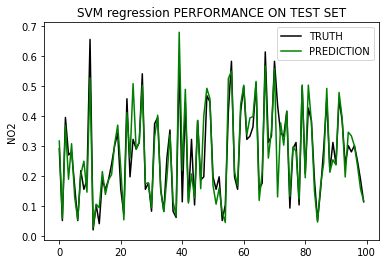

In [200]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('SVM regression PERFORMANCE ON TEST SET')
plt.ylabel('NO2')
plt.legend()
plt.show()

In [201]:
# IMPLEMENTING A NEURAL NETWORK
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='relu'))


model.compile(optimizer = "adam", loss ='mse', 
          metrics =["accuracy"])
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
16781/16781 [==============================] - 1s 72us/step - loss: 0.0037 - accuracy: 0.0013
Epoch 2/100
16781/16781 [==============================] - 1s 66us/step - loss: 0.0031 - accuracy: 0.0013
Epoch 3/100
16781/16781 [==============================] - 1s 65us/step - loss: 0.0031 - accuracy: 0.0013
Epoch 4/100
16781/16781 [==============================] - 1s 67us/step - loss: 0.0031 - accuracy: 0.0013
Epoch 5/100
16781/16781 [==============================] - 1s 70us/step - loss: 0.0030 - accuracy: 0.0013
Epoch 6/100
16781/16781 [==============================] - 1s 66us/step - loss: 0.0030 - accuracy: 0.0013
Epoch 7/100
16781/16781 [==============================] - 1s 66us/step - loss: 0.0030 - accuracy: 0.0013
Epoch 8/100
16781/16781 [==============================] - 1s 67us/step - loss: 0.0030 - accuracy: 0.0013
Epoch 9/100
16781/16781 [==============================] - 1s 68us/step - loss: 0.0030 - accuracy: 0.0013
Epoch 10/100
16781/16781 [====================

dict_keys(['loss', 'accuracy'])


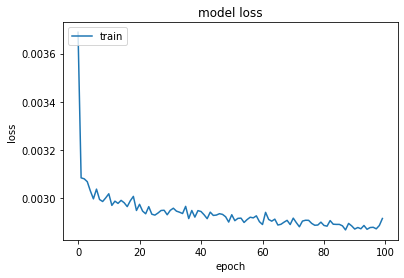

mean squared error :  0.0030000810731462993
mean absolute error :  0.03850170941762609
0.8886228885751236


In [202]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
y_pred = model.predict(X_test)
print('mean squared error : ',mean_squared_error(y_test,y_pred))
print('mean absolute error : ',mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
#Converting predictions to label


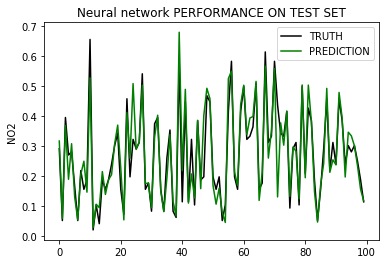

In [203]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Neural network PERFORMANCE ON TEST SET')
plt.ylabel('NO2')
plt.legend()
plt.show()

In [204]:
print(X_train)
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

print(X_train.shape)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
print(X_train.shape)

[[0.34375    0.35416667 0.39583333 0.34375   ]
 [0.125      0.125      0.07291667 0.08333333]
 [0.38541667 0.30208333 0.34375    0.28125   ]
 ...
 [0.36458333 0.38541667 0.375      0.25      ]
 [0.42708333 0.4375     0.4375     0.47916667]
 [0.4375     0.4375     0.35416667 0.39583333]]
(16781, 4)
(16781, 4, 1)


In [205]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
16781/16781 [==============================] - 7s 443us/step - loss: 0.0118
Epoch 2/100
16781/16781 [==============================] - 6s 372us/step - loss: 0.0035
Epoch 3/100
16781/16781 [==============================] - 6s 371us/step - loss: 0.0031
Epoch 4/100
16781/16781 [==============================] - 6s 361us/step - loss: 0.0030
Epoch 5/100
16781/16781 [==============================] - 6s 368us/step - loss: 0.0030
Epoch 6/100
16781/16781 [==============================] - 6s 367us/step - loss: 0.0031
Epoch 7/100
16781/16781 [==============================] - 6s 362us/step - loss: 0.0030
Epoch 8/100
16781/16781 [==============================] - 6s 378us/step - loss: 0.0030
Epoch 9/100
16781/16781 [==============================] - 6s 372us/step - loss: 0.0030
Epoch 10/100
16781/16781 [==============================] - 6s 373us/step - loss: 0.0030
Epoch 11/100
16781/16781 [==============================] - 6s 370us/step - loss: 0.0030
Epoch 12/100
16781/16781 [====

dict_keys(['loss'])


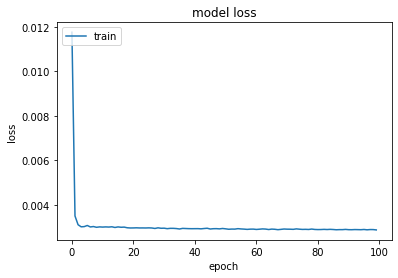

mean square error : 0.0031759398393642353
mean absolute error :  0.0417959709431012
0.8833212046654029


In [206]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
prediction = regressor.predict(X_test)
print("mean square error :" ,mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print("mean absolute error : ",mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

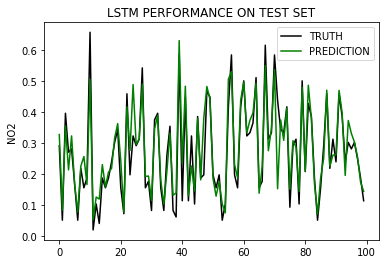

In [207]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('LSTM PERFORMANCE ON TEST SET')
plt.ylabel('NO2')
plt.legend()
plt.show()

In [0]:
#joblib.dump(regressor,'lstm_regressor.pkl')
#from google.colab import files
#files.download('lstm_regressor.pkl')